In [15]:
import sys
import os
sys.path.append('../')
import numpy as np
import scipy.signal as sps
from source.reader import read_raw
from source.interference_reject import InterferenceReject
import matplotlib.pyplot as plt
%matplotlib notebook

In [21]:
# Data import
file_name = "/Users/had-mr/github/data_interference/shield_attenuation/sine_x_closed.h5"
data, index, metadata = read_raw(file_name)
num_channels_all = metadata['console']['adc']['number_channels']
num_channels_signal = metadata['rf']['receive']['num_signal_channels']
matrix_size = metadata['sequence']['encoding']['matrix_size']
acq_bandwidth = metadata['sequence']['readout']['readouts'][0]['bandwidth']

<IPython.core.display.Javascript object>


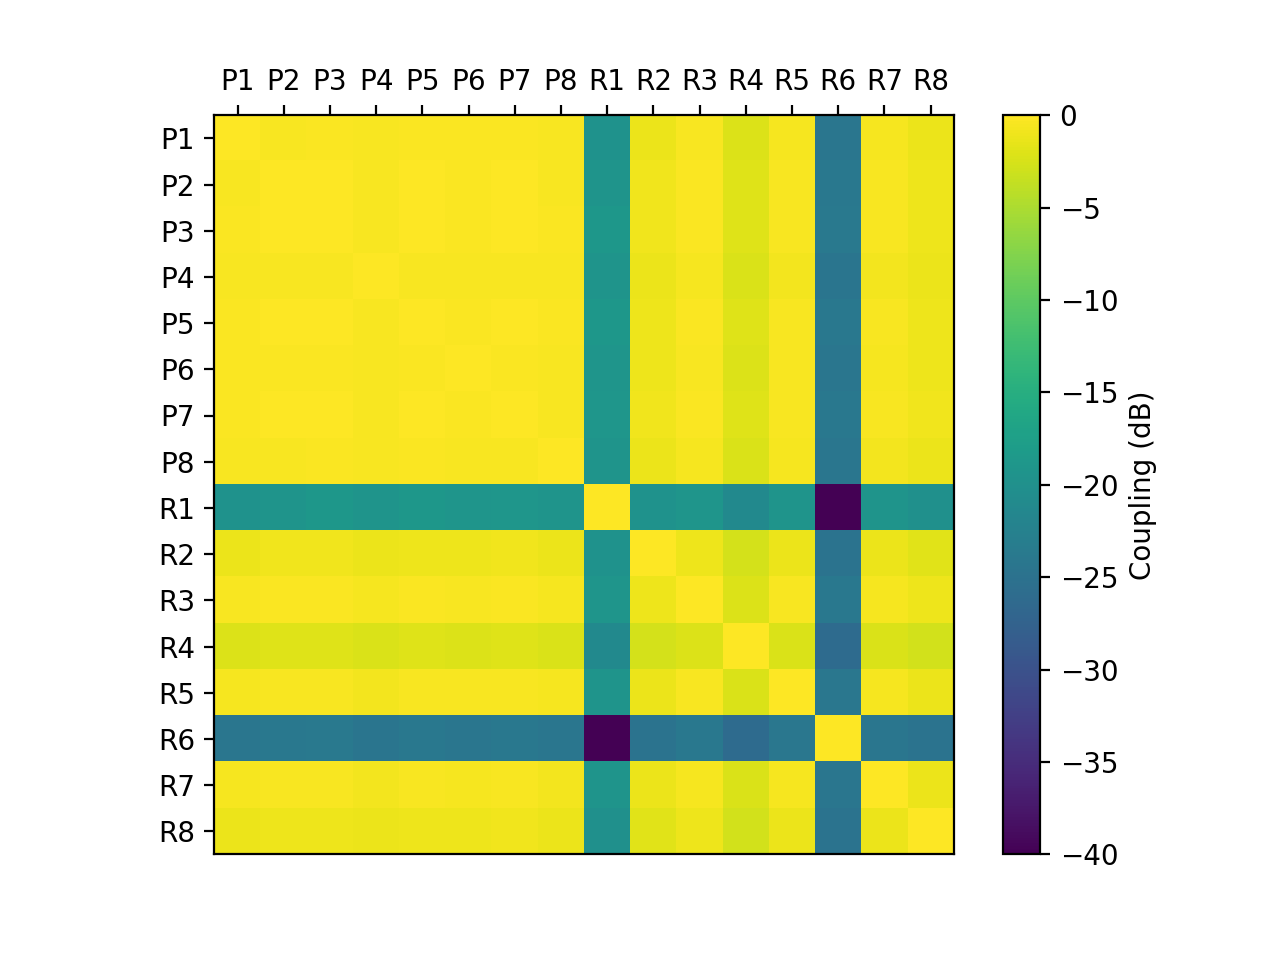

In [22]:
data_prescan = data['noise']
data_col = np.reshape(data_prescan, (data_prescan.shape[0],-1))
norm = np.std(data_col, axis=1)
data_col /= norm[:, None]
mat_cor = np.dot(np.conj(data_col), data_col.T)

mat_cor = np.dot(np.abs(np.diag(1/np.diag(mat_cor))), mat_cor)
x_labels = ['P1','P2','P3','P4','P5','P6','P7','P8','R1','R2','R3','R4','R5','R6','R7','R8']
fig, ax = plt.subplots(ncols=1, nrows=1)
im = ax.imshow(20*np.log10(np.abs(mat_cor)), vmin=-40, vmax=0)
ax.xaxis.tick_top()
ax.set_xticks(np.arange(16))
ax.set_xticklabels(x_labels)
ax.set_yticks(np.arange(16))
ax.set_yticklabels(x_labels)
cbar = fig.colorbar(im)
cbar.set_label('Coupling (dB)')
fig.show()
# plt.imshow(np.abs(mat_cor),vmin=0, vmax=1)



<IPython.core.display.Javascript object>


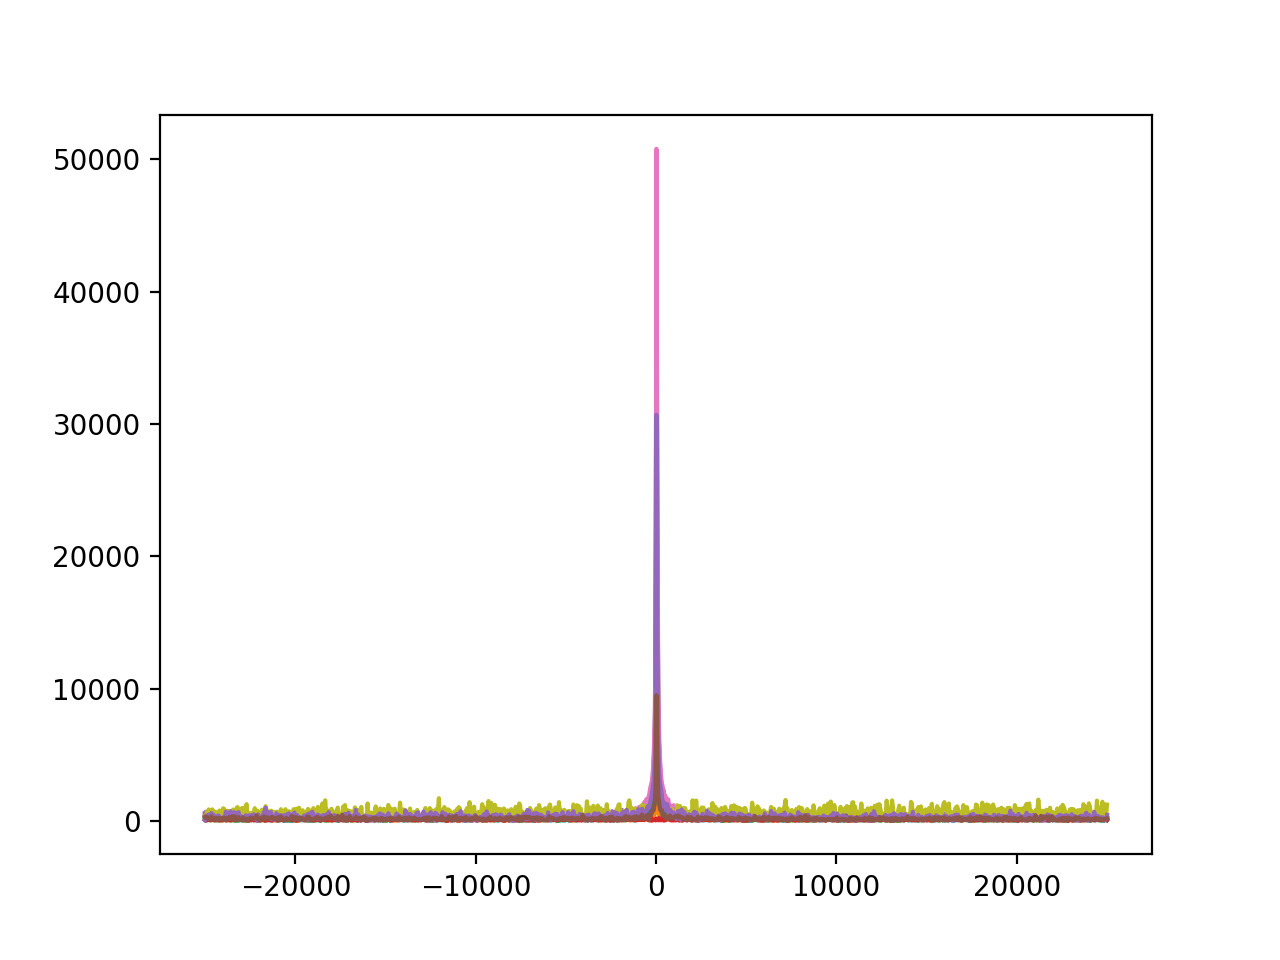

(16, 1000)
[100 180 182  89 157 138 230  91]
[  4  56 129  33  95   2  91  54]


In [23]:
# Shield attenuation
spec_scan = np.squeeze(np.fft.fftshift(np.fft.fft(data['scan'], axis=1), axes=1))
freq = np.linspace(-0.5, 0.5, spec_scan.shape[1]) * acq_bandwidth
plt.figure()
plt.plot(freq, np.squeeze(np.abs(spec_scan)).T)
plt.show()
print(spec_scan.shape)
max_sig = np.max(np.abs(spec_scan), axis=1)
sel_baseline = np.abs(freq) > 1e4
noise_std = np.std(spec_scan[:,sel_baseline], axis=1)
snr = max_sig / noise_std
print(snr[:8].astype(int))
print(snr[8:].astype(int))